# Fit the data by different functions at different ranges 
 (just technical skill, no science behind data!!) \
- use of python, numpy and scipy 
- read csv file by numpy
- separate data ranges 
- use of function and fit data separately
- plot overlay of fitted data and test data
- (method to create of these test data and save as csv file explained at end)


![img](multiFit.png)

--------------------------------------

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

## Read csv file by numpy

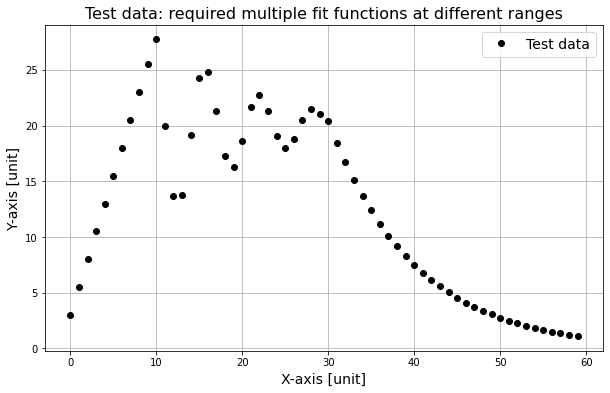

In [2]:
data = np.loadtxt("testData_multiFun_fit.csv",delimiter = ',')
#data = np.loadtxt("test4multiplot.txt", dtype = str)     #if file contains multiple data types
#data
x = data[:,0]
y = data[:,1]
#plot data
plt.figure(figsize = [10,6])
plt.plot(x,y,"o", color = "black", label = "Test data")
plt.title("Test data: required multiple fit functions at different ranges", fontsize=16)
plt.xlabel('X-axis [unit]', fontsize=14)
plt.ylabel('Y-axis [unit]', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)                                 # comment this if u do not need grid
plt.show()

In [3]:
x1 = data[0:10,0]
#print(x1)
x2 = data[10:30,0]
#print(x2)
x3 = data[30:60,0]
#print(x3)

y1 = data[0:10,1]
#print(y1)
y2 = data[10:30,1]
#print(y2)
y3 = data[30:60,1]
#print(y3)

## Tentative fit functions using python function 

In [4]:
#define the fit functions
def lin_fun(x,a1,a2):
    return a1*x + a2

def cos_fun(x,a3,a4,a5,a6):
    return a3*np.cos(x+a4)*np.exp(-x*a5) + a6

def exp_fun(x,a7,a8,a9):
    return a7*np.exp(-a8*x) + a9


### Linear fit

[2.5 3. ]
[[ 2.98810949e-34 -1.34464927e-33]
 [-1.34464927e-33  8.51611205e-33]]
a1 =  2.5 +- 1.7286149049150258e-17
a2 =  3.0000000000000004 +- 9.228278303704047e-17


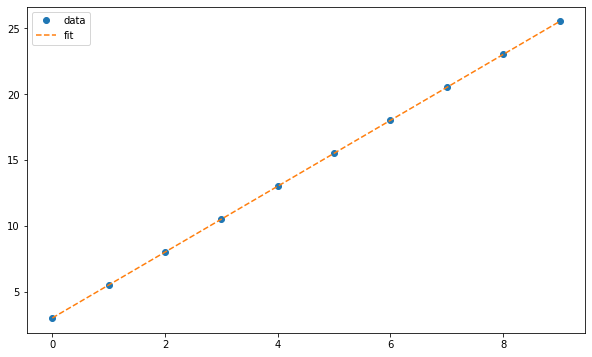

In [5]:
#curve_fit to find best fit parameters using a least square fit.
#popt = optimized parameters and pcov = varaince and covariance of parameters
popt,pcov = curve_fit(lin_fun,x1,y1)
p1,p2 = popt
print(popt)
print(pcov)
print("a1 = ", popt[0], "+-", pcov[0,0]**0.5)
print("a2 = ", popt[1], "+-", pcov[1,1]**0.5)

#x1_fit = np.arange(min(x1),max(x1),1)
x1_fit = np.arange(min(x1),max(x1)+1.0,1)
y1_fit = lin_fun(x1_fit, p1, p2)

plt.figure(figsize = [10,6])
plt.plot(x1,y1,"o", label = "data")
plt.plot(x1_fit,y1_fit,"--", label = "fit")
plt.legend()

### Damping sinusoidal fit

[25.00027265  3.13999924  0.10000067 19.99999218]


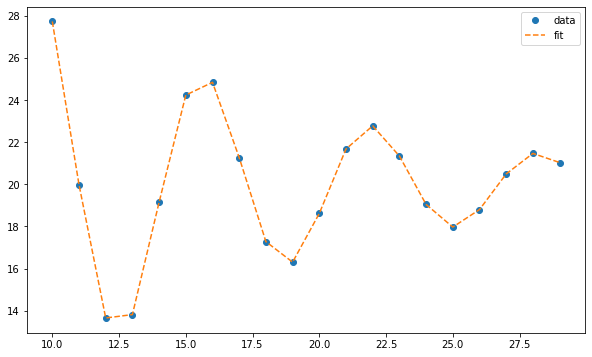

In [6]:
#popt1,pcov1 = curve_fit(cos_fun,x2,y2)               #we can fit but it gives warning
popt1,_ = curve_fit(cos_fun,x2,y2, [20,3,0.1,15])     #initial guess in [] bracket
p3,p4,p5,p6 = popt1
print(popt1)

x2_fit = np.arange(min(x2),max(x2)+1.0,1)
y2_fit = cos_fun(x2_fit,p3,p4,p5,p6)

plt.figure(figsize = [10,6])
plt.plot(x2,y2,"o", label = "data")
plt.plot(x2_fit,y2_fit,"--", label = "fit")
plt.legend()

### exponential decay fit

[4.10002933e+02 1.00000290e-01 2.90589628e-05]


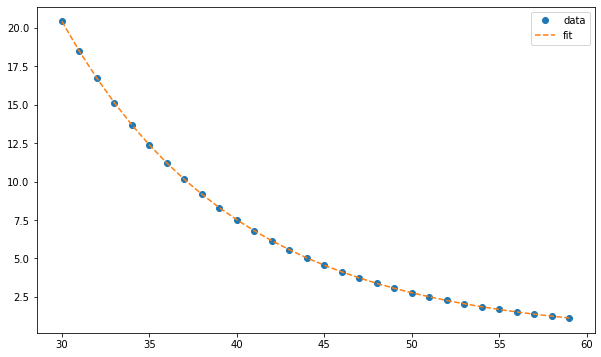

In [7]:
popt2, _ = curve_fit(exp_fun,x3,y3,[500,0.1,2])
p7,p8,p9 = popt2
print(popt2)

x3_fit = np.arange(min(x3),max(x3)+1,1)
y3_fit = exp_fun(x3_fit,p7,p8,p9)

plt.figure(figsize = [10,6])
plt.plot(x3,y3,"o", label = "data")
plt.plot(x3_fit,y3_fit,"--", label = "fit")
plt.legend()

## Final result: sum of all fits 

(10,)
(60,)
(10,)
(60,)
23.0000212430523
f(x) = {2.5*x + 3.0}
 + {25.0*cos(x + 3.14)*exp(-0.1x) + 20.0}
 + {410.0*exp(-0.1x) + 0.0}


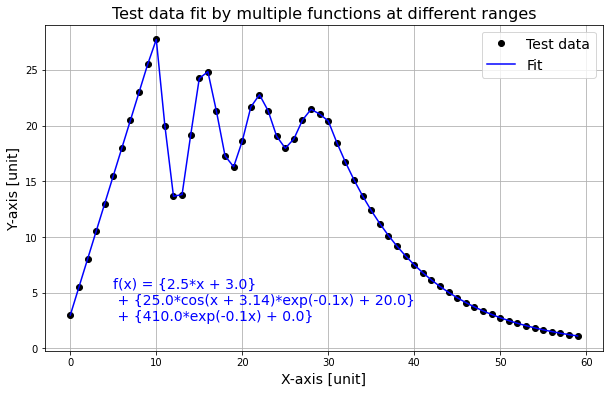

In [8]:
x_fit = np.concatenate((x1_fit,x2_fit,x3_fit), axis=0)
print(x1_fit.shape)
print(x_fit.shape)
y_fit = np.concatenate((y1_fit,y2_fit,y3_fit), axis = 0)
print(y1_fit.shape)
print(y_fit.shape)
sum_c = p2 + p6 + p9
print(sum_c)

#plot data
plt.figure(figsize = [10,6])
plt.plot(x,y,"o", color = "black", label = "Test data")
plt.plot(x_fit,y_fit,"-", color = "blue", label = "Fit")
plt.title("Test data fit by multiple functions at different ranges", fontsize=16)
plt.xlabel('X-axis [unit]', fontsize=14)
plt.ylabel('Y-axis [unit]', fontsize=14)

fitFun = "f(x) = {" + str(round(p1,2)) + "*x + " + str(round(p2,2)) + "}\n + {"\
+ str(round(p3,2)) + "*cos(x + " + str(round(p4,2)) + ")*exp(-" + str(round(p5,2)) + "x)" + " + " + str(round(p6,2)) + "}\n + {"\
+ str(round(p7,2)) + "*exp(-" + str(round(p8,2)) + "x) + " + str(round(p9,2)) +"}"

print(fitFun)

plt.text(5, 2.5, fitFun, fontsize = 14, color = "blue")
def lin_fun(x,a1,a2):
    return a1*x + a2

def cos_fun(x,a3,a4,a5,a6):
    return a3*np.cos(x+a4)*np.exp(-x*a5) + a6

def exp_fun(x,a7,a8,a9):
    return a7*np.exp(-a8*x) + a9


plt.legend(fontsize=14)
plt.grid(True)                                 # comment this if u do not need grid
plt.savefig("multifun_fit_test_data_fitted.png")                    # png, jpg, eps, pdf as u like
plt.show()

---------------------------------------------------------------------------------------------------------------------
- careful about constant background of overall data which is not sum of three constant parts in this example....!!

-----------------------------
## how above test data were created and saved to csv file (for reference)

(60,)


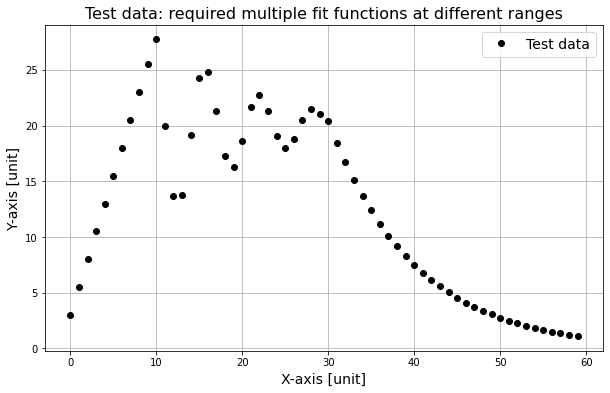

In [9]:
x = np.arange(50)
#print(x)
x1 = np.arange(0,10,1)
#print(x1)
y1 = 2.5*x1 + 3
#print(y1)
#plt.plot(x1,y1,"o")

x2 = np.arange(10,30,1)
#print(x2)
y2 = 25*np.cos(x2 + 3.14/1.0)*np.exp(-0.1*x2) + 20
#print(y2)
#plt.plot(x2,y2,"--")

x3 = np.arange(30,60,1)
y3 = 410*np.exp(-0.1*x3)
#plt.plot(x3,y3,"--")

#err = np.random.rand(50)
err = np.random.randint(0,3,60)
#print(err)      #you can add this error and play with error bar etc.

x = np.concatenate((x1,x2,x3),axis=0)
#print(x)
y = np.concatenate((y1,y2,y3),axis=0)
#print(y)
print(x.shape)

#so far x and y are one row. change row to column to add both in a file with separate column
xcol = x.reshape(-1,1)         #-1 for all values and 1 for column
ycol = y.reshape(-1,1)         

#concatenate xcol and ycol
dat4write = np.concatenate((xcol,ycol),axis = 1)

#write data in csv file
with open("testData_multiFun_fit.csv", "w") as f:
    np.savetxt(f, dat4write, fmt='%12.4f', header = "x, y", delimiter=',')

#plot data
plt.figure(figsize = [10,6])
plt.plot(x,y,"o", color = "black", label = "Test data")
plt.title("Test data: required multiple fit functions at different ranges", fontsize=16)
plt.xlabel('X-axis [unit]', fontsize=14)
plt.ylabel('Y-axis [unit]', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)                                 # comment this if u do not need grid
plt.savefig("multifun_fit_test_data_plot.png")                    # png, jpg, eps, pdf as u like
plt.show()